## Experiment : Running Gradient Boosting for the raw data 

The raw data has been encoded into 4 different versions to experiment the Grandient Boosting models regarding cateogorical feature handling and encoding methods:

**One-Hot Encoding for categorical features**

- **0**: raw data, no use of categorical features parameters
- **1**: raw data, use of categorical features parameters for nominal features only
- **2**: raw data, use of categorical features parameters for nominal and oridinal feature
- **3**: get_dummies for all categorical columns, no use of categorical features parameters

- All negative values such as -8 or -9 are encoded 0 meaning valid skip
- Run 4 different Gradient Boosting models, CatBoost, XGBoost, LightGBM and HistGradientBoosting, for the raw cleaned data with specifying the indices of categorical features for the models to handle


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
# import warnings 
# warnings.filterwarnings("ignore")
from pandas import MultiIndex, Int16Dtype

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [3]:
df = pd.read_csv('../../data/data_clean/SASS_99_00_T2_T3_S4A_S3A_S2A.csv', sep=',', header=0)
print(df.shape)

(3640, 128)


In [4]:
cols_old = ['CNTLNUM_T',
'SCHCNTL',
'F0195',
'F0196',
'F0197',
'FTPT_S',
'GENDER',
'AGE_T',
'RACETH_T',
'T0072',
'T0081',
'A0225',
'NEWTCH',
'RACETH_P',
'S0282',
'S0285',
'S0288',
'S0306',
'S0307',
'S0308',
'TOTEXPER',
'T0102',
'S1611',
'S1612',
'T0065',
'T0082',
'S1613',
'T0066',
'S1614',
'T0068',
'T0069',
'S1615',
'S1616',
'S1617',
'S1618',
'S1619',
'S1620',
'S1621',
'S1622',
'S1623',
'S1624',
'S1625',
'S1626',
'S1627',
'T0206',
'T0067',
'T0209',
'T0210',
'T0211',
'T0212',
'T0273',
'T0339',
'T0340',
'T0341',
'T0343',
'T0345',
'T0347',
'T0348',
'T0350',
'T0352',
'T0070',
'T0080',
'T0084',
'T0087',
'T0090',
'MINTCH',
'EARNALL',
'EARNSCH',
'T0093',
'T0104',
'STU_TCH',
'T0096',
'PGMTYPE',
'SCHLEVEL',
'MINENR',
'T0099',
'S0290',
'T0103',
'T0120',
'T0179',
'URBANIC',
'REGION',
'T0180',
'S0283',
'S0284',
'T0181',
'S0286',
'S0287',
'T0182',
'T0183',
'T0184',
'T0191',
'T0192',
'T0193',
'T0194',
'T0195',
'T0196',
'T0197',
'T0198',
'T0199',
'T0200',
'T0201',
'T0202',
'T0203',
'T0204',
'CNTLNUM_P',
'AGE_P',
'T0205',
'A0053',
'A0054',
'A0055',
'A0056',
'T0355',
'A0226',
'A0227',
'S0265',
'S0266',
'S0267',
'S0268',
'S0269',
'S0270',
'S0271',
'S0272',
'S0273',
'S0274',
'S0275',
'S0276']

cols_new = ['CNTLNUM_T',
'SCHCNTL',
'marital_status',
'num_dependents',
'dependents_age5',
'ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'total_tch_yr',
'field',
'incen_certification',
'incen_excellence',
'public_ft_exp',
'MA_grad_yr',
'incen_prof_dev',
'public_pt_exp',
'incen_location',
'private_ft_exp',
'private_pt_exp',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'hrs_tch_ELA',
'hrs_tch_math',
'hrs_tch_social',
'hrs_tch_science',
'hrs_in_school_wk',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'stu_tch_ratio',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'CNTLNUM_P',
'age_P',
'teaches_12th',
'yrs_P_this_sch',
'yrs_P_oth_schls',
'yrs_tch_before_P',
'yrs_tch_since_P',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [5]:
cols_cat= ['marital_status',
'ft_pt_status',
'gender_T',
'age_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'field',
'incen_certification',
'incen_excellence',
'MA_grad_yr',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'would_be_tch',
'remain_teaching',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'base_salary',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'minority_teachers',
'earnings_total',
'earnings_school',
'deg_T_EdS',
'cert_type',
'deg_T_AdvGrad',
'sch_type',
'level',
'minority_students',
'deg_T_Phd',
'title1_receive_stu',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'pd_stipend',
'FRPL_approved_pk',
'FRPL_approved_k12',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'age_P',
'teaches_12th',
'union_member',
'salary_P',
'gender_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

cols_cat_nom = ['marital_status',
'ft_pt_status',
'gender_T',
'race_T',
'BA_major',
'MA_major',
'deg_P',
'new_teacher',
'race_P',
'FRPL_eligible',
'NLP_participate',
'title1_receive',
'title1_reading',
'title1_math',
'title1_esl',
'field',
'incen_certification',
'incen_excellence',
'incen_prof_dev',
'incen_location',
'incen_reten',
'incen_reten_gen_elem',
'incen_reten_spec_ed',
'incen_reten_english',
'incen_reten_soc_studies',
'incen_reten_STEM_comp_sci',
'incen_reten_STEM_math',
'incen_reten_STEM_phys_sci',
'incen_reten_STEM_biology',
'incen_reten_esl',
'incen_reten_foreign_lang',
'incen_reten_music_art',
'incen_reten_voc_ed',
'class_org',
'private_exp',
'summer_teaching',
'nonteaching_job',
'nonschool_job',
'extracur_act',
'merit_pay',
'outside_pay',
'deg_T_BA',
'deg_T_MA',
'deg_T_AA',
'deg_T_BA2',
'deg_T_MA2',
'deg_T_EdS',
'cert_type',
'deg_T_AdvGrad',
'sch_type',
'level',
'deg_T_Phd',
'cert_holder',
'field_same',
'pd_release_time',
'urbanicity',
'region',
'pd_schedule_time',
'pd_stipend',
'pd_tuition_reimb',
'pd_conference_reimb',
'pd_travel_reimb',
'teaches_ungraded',
'teaches_pk',
'teaches_k',
'teaches_1st',
'teaches_2nd',
'teaches_3rd',
'teaches_4th',
'teaches_5th',
'teaches_6th',
'teaches_7th',
'teaches_8th',
'teaches_9th',
'teaches_10th',
'teaches_11th',
'teaches_12th',
'union_member',
'gender_P']

cols_cat_ord = ['age_T',
'MA_grad_yr',
'would_be_tch',
'remain_teaching',
'base_salary',
'minority_teachers',
'earnings_total',
'earnings_school',
'minority_students',
'title1_receive_stu',
'FRPL_eligible_pk',
'FRPL_eligible_k12',
'FRPL_approved_pk',
'FRPL_approved_k12',
'age_P',
'salary_P',
'vacnc_gen_elem',
'vacnc_spec_ed',
'vacnc_english',
'vacnc_soc_st',
'vacnc_comp_sci',
'vacnc_math',
'vacnc_biology',
'vacnc_phys_sci',
'vacnc_esl',
'vacnc_foreign_lang',
'vacnc_music_art',
'vacnc_vo_tech']

In [6]:
df.rename(columns=dict(zip(cols_old, cols_new)), inplace=True)

**One-Hot Encoding for categorical features**

the dataframe has been encoded into 4 different ways:

- **0**: raw data, no use of categorical features parameters
- **1**: raw data, use of categorical features parameters for nominal features only
- **2**: raw data, use of categorical features parameters for nominal and oridinal feature
- **3**: get_dummies for all categorical columns, no use of categorical features parameters
- **4**: get_dummies for all categorical columns, use of categorical features parameters

In [7]:
def encoding (df, ver):  
    #marked as 0 for valid skipped answers
    for c in df.columns:
        if (df[c]<0).any(): df[c]=df[c].apply(lambda x: 0 if x < 0 else int(x))
         
    if ver == 0: return df, []  
    if ver == 1: return df, cols_cat_nom
    if ver == 2: return df, cols_cat
    
    categorical_cols = []
    df_temp = pd.get_dummies(df[cols_cat], columns=cols_cat)
    for c in df_temp: categorical_cols.append(c)
    df.drop(columns=cols_cat, inplace=True)
    df=pd.concat([df, df_temp], axis=1)
    df=df.astype({c: 'int' for c in categorical_cols})   

    if ver == 3: return df, []
    
    return df, categorical_cols

**Split data**

In [8]:
random_state=123

In [9]:
def split_data (df):
    label = ['label']
    cols_drop = ['CNTLNUM_T', 'SCHCNTL', 'CNTLNUM_P']

    y = df[label].values.ravel()
    X = df.drop(columns=label + cols_drop).copy()
    columns = df.drop(columns=label + cols_drop).columns.tolist()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, columns

**n iteration for models**

In [10]:
def get_n_iter (param_grid):
    n_iter_ratio = 0.25
    n_iter = 1
    for v in param_grid.values(): n_iter*=len(v)
    n_iter *= n_iter_ratio

    return int(n_iter)

### Modeling

In [11]:
encoding_type=['Raw-No Cat', 'Raw-Cat Nom', 'Raw-Cat Nom+Ord', 'OneHot-No Cat', 'OneHot-Cat Nom_Ord']
rounds = 20

In [12]:
def model_report(estimator, param_grid, fit_params, name):
    result = pd.DataFrame()
    cv=5

    n_iter=get_n_iter(param_grid)
    print('{} n_iter: {:0.0f}'.format(name, n_iter))  

    for enc_ver, use_cat in zip(range(len(encoding_type)),[False, True, True, False, True]):
        df_copy, categorical_cols = encoding(df.copy(), enc_ver)
        X_train, X_test, y_train, y_test, columns = split_data(df_copy.copy())   
        categorical_cols_idx = [columns.index(c) for c in categorical_cols]

        X_train_XG=pd.concat([X_train[c].astype('category') if c in categorical_cols else X_train[c] for c in X_train.columns], axis=1)
        X_test_XG=pd.concat([X_test[c].astype('category') if c in categorical_cols else X_test[c] for c in X_test.columns], axis=1)

        if use_cat:
            if (name == 'LightGBM'): fit_params['categorical_feature']=categorical_cols_idx            
            if (name == 'CatBoost'): fit_params['cat_features']=categorical_cols_idx
            if (name == 'HistGB'): estimator.set_params(**{'categorical_features': categorical_cols_idx})

        if not use_cat or len(categorical_cols) == 0: 
            if (name == 'LightGBM'): fit_params['categorical_feature']=None
            if (name == 'CatBoost'): fit_params['cat_features']=None
            if (name == 'HistGB'): estimator.set_params(**{'categorical_features': None})

        grid = RandomizedSearchCV(estimator, param_distributions=param_grid, cv=cv, n_jobs=-1, 
                            random_state=random_state, n_iter=n_iter)

        start_cpu = time.process_time()
        start_wall = time.time()

        if name == 'HistGB': 
            grid.fit(X_train, y_train)
        elif name == 'XGBoost':
            fit_params['eval_set'] =  [(X_test_XG.copy(), y_test.copy())]
            grid.fit(X_train_XG.copy(), y_train.copy(), **fit_params)
            grid.best_estimator_.save_model("categorical-model.json") 
            print("MAX_CAT", str(estimator.get_xgb_params()['max_cat_to_onehot']))  
        else:
            fit_params['eval_set'] =  [(X_test, y_test)]
            grid.fit(X_train, y_train, **fit_params)  

        cpu_time = time.process_time() - start_cpu
        wall_time = time.time() - start_wall

        y_pred = grid.best_estimator_.predict(X_test)
        temp = {'Model': name,
                'enc_ver': encoding_type[enc_ver],
                'n features': len(columns),
                'n cat_features': len(categorical_cols),
                'best_params': grid.best_params_,
                'Best Accuracy': grid.best_score_, 
                'Train Accuracy': grid.best_estimator_.score(X_train, y_train),
                'Test Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'MCC': matthews_corrcoef(y_test, y_pred), 
                'F1': f1_score(y_test, y_pred),
    #                 'ROC': roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr', average=avg),
                'conf_mat': confusion_matrix(y_test, y_pred), 
                'Prediction': y_pred,
                'predict_proba': grid.best_estimator_.predict_proba(X_test),
    #             'Features': features,
                'estimator': grid.best_estimator_,
                'classification_report': classification_report(y_test, y_pred),
                'Train Time CPU': cpu_time,
                'Train Time Wall': wall_time,
                'n_iter': n_iter}
        result = pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

In [13]:
results = pd.DataFrame()

**CatBoost**

In [14]:
%%time
from catboost import CatBoostClassifier

params = {'iterations': [50, 100, 200],
'depth': [3, 6, 9],
'min_data_in_leaf': [1, 5, 10],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg': [0, 0.01, 0.1, 1, 10],
'random_strength': [0, 5, 10, 15]}

fit_params = {'early_stopping_rounds': rounds}

estimator = CatBoostClassifier(random_seed=random_state, verbose=False, eval_metric="Logloss", 
                               one_hot_max_size=4, border_count=254)

result_report=model_report(estimator, params, fit_params, 'CatBoost')
results=pd.concat([results, result_report], ignore_index=True)

CatBoost n_iter: 540
CPU times: total: 1min 40s
Wall time: 1h 32min 55s


**XGBoost**

In [15]:
%%time
import xgboost

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, 0],
'min_child_weight': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'alpha': [0,  0.1, 10],
'lambda': [0,  0.1, 10],
'gamma': [0,  0.1, 10]}

estimator = xgboost.XGBClassifier(seed=random_state, objective="binary:logistic", eval_metric="logloss", use_label_encoder=False,
                                  tree_method="hist", early_stopping_rounds=rounds, max_cat_to_onehot=4, enable_categorical=True)


result_report=model_report(estimator, params, {}, 'XGBoost')       
results=pd.concat([results, result_report], ignore_index=True)

XGBoost n_iter: 972
[0]	validation_0-logloss:0.65046
[1]	validation_0-logloss:0.61620
[2]	validation_0-logloss:0.59408
[3]	validation_0-logloss:0.57629
[4]	validation_0-logloss:0.56337
[5]	validation_0-logloss:0.55087
[6]	validation_0-logloss:0.54169
[7]	validation_0-logloss:0.53294
[8]	validation_0-logloss:0.52624
[9]	validation_0-logloss:0.52133
[10]	validation_0-logloss:0.51657
[11]	validation_0-logloss:0.51398
[12]	validation_0-logloss:0.51036
[13]	validation_0-logloss:0.50771
[14]	validation_0-logloss:0.50647
[15]	validation_0-logloss:0.50415
[16]	validation_0-logloss:0.50175
[17]	validation_0-logloss:0.49956
[18]	validation_0-logloss:0.49902
[19]	validation_0-logloss:0.49609
[20]	validation_0-logloss:0.49560
[21]	validation_0-logloss:0.49523
[22]	validation_0-logloss:0.49578
[23]	validation_0-logloss:0.49616
[24]	validation_0-logloss:0.49579
[25]	validation_0-logloss:0.49432
[26]	validation_0-logloss:0.49333
[27]	validation_0-logloss:0.49336
[28]	validation_0-logloss:0.49298
[29]

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

[26]	validation_0-logloss:0.49426
[27]	validation_0-logloss:0.49306
[28]	validation_0-logloss:0.49371
[29]	validation_0-logloss:0.49413
[30]	validation_0-logloss:0.49395
[31]	validation_0-logloss:0.49415
[32]	validation_0-logloss:0.49414
[33]	validation_0-logloss:0.49307
[34]	validation_0-logloss:0.49389
[35]	validation_0-logloss:0.49389
[36]	validation_0-logloss:0.49389
[37]	validation_0-logloss:0.49389
[38]	validation_0-logloss:0.49389
[39]	validation_0-logloss:0.49389
[40]	validation_0-logloss:0.49389
[41]	validation_0-logloss:0.49389
[42]	validation_0-logloss:0.49389
[43]	validation_0-logloss:0.49389
[44]	validation_0-logloss:0.49389
[45]	validation_0-logloss:0.49389
[46]	validation_0-logloss:0.49389
MAX_CAT 4
[0]	validation_0-logloss:0.64357
[1]	validation_0-logloss:0.61172
[2]	validation_0-logloss:0.58781
[3]	validation_0-logloss:0.56912
[4]	validation_0-logloss:0.55278
[5]	validation_0-logloss:0.54377
[6]	validation_0-logloss:0.53417
[7]	validation_0-logloss:0.52861
[8]	validati

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

[26]	validation_0-logloss:0.49922
[27]	validation_0-logloss:0.49821
[28]	validation_0-logloss:0.49681
[29]	validation_0-logloss:0.49475
[30]	validation_0-logloss:0.49515
[31]	validation_0-logloss:0.49468
[32]	validation_0-logloss:0.49475
[33]	validation_0-logloss:0.49534
[34]	validation_0-logloss:0.49631
[35]	validation_0-logloss:0.49631
[36]	validation_0-logloss:0.49631
[37]	validation_0-logloss:0.49631
[38]	validation_0-logloss:0.49631
[39]	validation_0-logloss:0.49631
[40]	validation_0-logloss:0.49631
[41]	validation_0-logloss:0.49631
[42]	validation_0-logloss:0.49631
[43]	validation_0-logloss:0.49631
[44]	validation_0-logloss:0.49631
[45]	validation_0-logloss:0.49631
[46]	validation_0-logloss:0.49631
[47]	validation_0-logloss:0.49631
[48]	validation_0-logloss:0.49631
[49]	validation_0-logloss:0.49631
[50]	validation_0-logloss:0.49631
MAX_CAT 4
[0]	validation_0-logloss:0.62497
[1]	validation_0-logloss:0.58697
[2]	validation_0-logloss:0.56319
[3]	validation_0-logloss:0.54688
[4]	vali

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed[data.columns[i]] = (
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\xgboost\data.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

[0]	validation_0-logloss:0.62497
[1]	validation_0-logloss:0.58697
[2]	validation_0-logloss:0.56319
[3]	validation_0-logloss:0.54688
[4]	validation_0-logloss:0.53454
[5]	validation_0-logloss:0.52545
[6]	validation_0-logloss:0.51732
[7]	validation_0-logloss:0.50928
[8]	validation_0-logloss:0.50704
[9]	validation_0-logloss:0.50410
[10]	validation_0-logloss:0.50276
[11]	validation_0-logloss:0.50212
[12]	validation_0-logloss:0.50254
[13]	validation_0-logloss:0.50112
[14]	validation_0-logloss:0.50023
[15]	validation_0-logloss:0.50022
[16]	validation_0-logloss:0.49785
[17]	validation_0-logloss:0.49685
[18]	validation_0-logloss:0.49563
[19]	validation_0-logloss:0.49427
[20]	validation_0-logloss:0.49383
[21]	validation_0-logloss:0.49585
[22]	validation_0-logloss:0.49666
[23]	validation_0-logloss:0.49467
[24]	validation_0-logloss:0.49676
[25]	validation_0-logloss:0.49653
[26]	validation_0-logloss:0.49788
[27]	validation_0-logloss:0.49848
[28]	validation_0-logloss:0.49772
[29]	validation_0-loglos

**LightGBM**

In [16]:
%%time
import lightgbm as lgb

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, -1],
'min_sum_hessian_in_leaf': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'reg_alpha': [0,  0.1, 10],
'reg_lambda': [0,  0.1, 10],
'min_split_gain': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds}

estimator = lgb.LGBMClassifier(random_state=random_state, objective="binary", metric="binary_logloss", verbosity=-1, silent=True, force_col_wise=True,
                               is_unbalance=True, max_cat_threshold=32)

result_report=model_report(estimator, params, fit_params, 'LightGBM')
results=pd.concat([results, result_report], ignore_index=True)

LightGBM n_iter: 972
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's binary_logloss: 0.652892
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.634808
[3]	valid_0's binary_logloss: 0.620537
[4]	valid_0's binary_logloss: 0.608682
[5]	valid_0's binary_logloss: 0.597412
[6]	valid_0's binary_logloss: 0.588496
[7]	valid_0's binary_logloss: 0.579164
[8]	valid_0's binary_logloss: 0.572345
[9]	valid_0's binary_logloss: 0.565771
[10]	valid_0's binary_logloss: 0.559898
[11]	valid_0's binary_logloss: 0.555299
[12]	valid_0's binary_logloss: 0.550371
[13]	valid_0's binary_logloss: 0.546858
[14]	valid_0's binary_logloss: 0.542554
[15]	valid_0's binary_logloss: 0.540103
[16]	valid_0's binary_logloss: 0.537634
[17]	valid_0's binary_logloss: 0.534527
[18]	valid_0's binary_logloss: 0.531467
[19]	valid_0's binary_logloss: 0.528509
[20]	valid_0's binary_logloss: 

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 3, 4, 9, 10, 14, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 61, 62, 63, 65, 66, 67, 68, 71, 72, 85, 88, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 121, 123]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.001, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.001
[1]	valid_0's binary_logloss: 0.651474
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.633896
[3]	valid_0's binary_logloss: 0.619005
[4]	valid_0's binary_logloss: 0.607246
[5]	valid_0's binary_logloss: 0.595228
[6]	valid_0's binary_logloss: 0.585774
[7]	valid_0's binary_logloss: 0.575829
[8]	valid_0's binary_logloss: 0.568495
[9]	valid_0's binary_logloss: 0.560713
[10]	valid_0's binary_logloss: 0.55384
[11]	valid_0's binary_logloss: 0.548096
[12]	valid_0's binary_logloss: 0.543993
[13]	valid_0's binary_logloss: 0.540797
[14]	valid_0's binary_logloss: 0.536304
[15]	valid_0's binary_logloss: 0.531642
[16]	valid_0's binary_logloss: 0.529277
[17]	valid_0's binary_logloss: 0.527262
[18]	valid_0's binary_logloss: 0.523664
[19]	valid_0's binary_logloss: 0.522563
[20]	valid_0's binary_logloss: 0.521122
[21]	

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 3, 4, 5, 6, 7, 8, 9, 10, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 120, 121, 122, 123]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_war

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's binary_logloss: 0.652593
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.633586
[3]	valid_0's binary_logloss: 0.618876
[4]	valid_0's binary_logloss: 0.604818
[5]	valid_0's binary_logloss: 0.592586
[6]	valid_0's binary_logloss: 0.583177
[7]	valid_0's binary_logloss: 0.573585
[8]	valid_0's binary_logloss: 0.565602
[9]	valid_0's binary_logloss: 0.558213
[10]	valid_0's binary_logloss: 0.552176
[11]	valid_0's binary_logloss: 0.545675
[12]	valid_0's binary_logloss: 0.541443
[13]	valid_0's binary_logloss: 0.538222
[14]	valid_0's binary_logloss: 0.534233
[15]	valid_0's binary_logloss: 0.530333
[16]	valid_0's binary_logloss: 0.52689
[17]	valid_0's binary_logloss: 0.52322
[18]	valid_0's binary_logloss: 0.519479
[19]	valid_0's binary_logloss: 0.516755
[20]	valid_0's binary_logloss: 0.515784
[21]	valid_0's

C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML310\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 16

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0.1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0.1
[1]	valid_0's binary_logloss: 0.630827
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.605208
[3]	valid_0's binary_logloss: 0.585508
[4]	valid_0's binary_logloss: 0.570299
[5]	valid_0's binary_logloss: 0.558523
[6]	valid_0's binary_logloss: 0.548422
[7]	valid_0's binary_logloss: 0.54195
[8]	valid_0's binary_logloss: 0.536374
[9]	valid_0's binary_logloss: 0.531596
[10]	valid_0's binary_logloss: 0.525723
[11]	valid_0's binary_logloss: 0.525345
[12]	valid_0's binary_logloss: 0.522348
[13]	valid_0's binary_logloss: 0.518879
[14]	valid_0's binary_logloss: 0.518036
[15]	valid_0's binary_logloss: 0.514469
[16]	valid_0's binary_logloss: 0.514835
[17]	valid_0's binary_logloss: 0.513866
[18]	valid_0's binary_logloss: 0.51299
[19]	valid_0's binary_logloss: 0.511413
[20]	valid_0's binary_logloss: 0.510829
[21]	valid

**HistGradientBoosting**

In [18]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

params = {'max_iter': [50, 100, 200],
'max_depth': [1, 6, None],
'max_leaf_nodes': [10, 31, 50, 64],
'min_samples_leaf': [10, 20, 30],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_regularization': [0, 0.01, 0.1, 1, 10]}

fit_params = {}

estimator=HistGradientBoostingClassifier(random_state=random_state, n_iter_no_change=rounds, early_stopping=True)

result_report=model_report(estimator, params, fit_params, 'HistGB')
results=pd.concat([results, result_report], ignore_index=True)

HistGB n_iter: 540
CPU times: total: 3min 52s
Wall time: 4h 52min 16s


In [19]:
results.to_csv('Modeling_NA_GB.csv', index=False)

## Result ##

In [20]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)[['Model', 'enc_ver', 'n features', 'n cat_features', 'Test Accuracy', 'Precision', 'Recall', 'MCC', 'F1', 'best_params']]

,Model,enc_ver,n features,n cat_features,Test Accuracy,Precision,Recall,MCC,F1,best_params
1,CatBoost,Raw-Cat Nom,124,79,0.776099,0.770916,0.889655,0.526953,0.826041,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."
15,HistGB,Raw-No Cat,124,0,0.776099,0.780992,0.868966,0.526905,0.822633,"{'min_samples_leaf': 20, 'max_leaf_nodes': 31,..."
16,HistGB,Raw-Cat Nom,124,79,0.776099,0.777551,0.875862,0.526735,0.823784,"{'min_samples_leaf': 20, 'max_leaf_nodes': 10,..."
0,CatBoost,Raw-No Cat,124,0,0.774725,0.778234,0.871264,0.523821,0.822126,"{'random_strength': 0, 'min_data_in_leaf': 10,..."
4,CatBoost,OneHot-Cat Nom_Ord,596,579,0.774725,0.771543,0.885057,0.523810,0.824411,"{'random_strength': 0, 'min_data_in_leaf': 1, ..."
12,LightGBM,Raw-Cat Nom+Ord,124,107,0.771978,0.813520,0.802299,0.527575,0.807870,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima..."
8,XGBoost,OneHot-No Cat,596,0,0.771978,0.786780,0.848276,0.519316,0.816372,"{'n_estimators': 100, 'min_child_weight': 1, '..."
9,XGBoost,OneHot-Cat Nom_Ord,596,579,0.771978,0.786780,0.848276,0.519316,0.816372,"{'n_estimators': 100, 'min_child_weight': 1, '..."
3,CatBoost,OneHot-No Cat,596,0,0.771978,0.771717,0.878161,0.517726,0.821505,"{'random_strength': 5, 'min_data_in_leaf': 1, ..."
2,CatBoost,Raw-Cat Nom+Ord,124,107,0.769231,0.764356,0.887356,0.511938,0.821277,"{'random_strength': 0, 'min_data_in_leaf': 5, ..."


**Accuracy, MCC and F1 Score**

In [21]:
results

,Model,enc_ver,n features,n cat_features,best_params,Best Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,MCC,F1,conf_mat,Prediction,predict_proba,estimator,classification_report,Train Time CPU,Train Time Wall,n_iter
0,CatBoost,Raw-No Cat,124,0,"{'random_strength': 0, 'min_data_in_leaf': 10,...",0.745190,0.785371,0.774725,0.778234,0.871264,0.523821,0.822126,"[[185, 108], [56, 379]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.0794894028492883, 0.9205105971507117], [0....",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,12.218750,394.697768,540
1,CatBoost,Raw-Cat Nom,124,79,"{'random_strength': 0, 'min_data_in_leaf': 5, ...",0.743472,0.764080,0.776099,0.770916,0.889655,0.526953,0.826041,"[[178, 115], [48, 387]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.09359967894782328, 0.9064003210521767], [0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,10.781250,986.435108,540
2,CatBoost,Raw-Cat Nom+Ord,124,107,"{'random_strength': 0, 'min_data_in_leaf': 5, ...",0.741763,0.823489,0.769231,0.764356,0.887356,0.511938,0.821277,"[[174, 119], [49, 386]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.11838726304343239, 0.8816127369565676], [0...",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,18.406250,1778.509793,540
3,CatBoost,OneHot-No Cat,596,0,"{'random_strength': 5, 'min_data_in_leaf': 1, ...",0.744502,0.983860,0.771978,0.771717,0.878161,0.517726,0.821505,"[[180, 113], [53, 382]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[[0.04099704502079504, 0.959002954979205], [0....",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,37.015625,1064.811032,540
4,CatBoost,OneHot-Cat Nom_Ord,596,579,"{'random_strength': 0, 'min_data_in_leaf': 1, ...",0.744501,0.974588,0.774725,0.771543,0.885057,0.523810,0.824411,"[[179, 114], [50, 385]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.03604980764836496, 0.963950192351635], [0....",<catboost.core.CatBoostClassifier object at 0x...,precision recall f1-score ...,19.031250,1347.394765,540
5,XGBoost,Raw-No Cat,124,0,"{'n_estimators': 200, 'min_child_weight': 0, '...",0.745195,0.841003,0.766484,0.780127,0.848276,0.507122,0.812775,"[[189, 104], [66, 369]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.057593822, 0.9424062], [0.6477425, 0.35225...","XGBClassifier(alpha=10, base_score=0.5, booste...",precision recall f1-score ...,21.015625,189.169025,972
6,XGBoost,Raw-Cat Nom,124,79,"{'n_estimators': 50, 'min_child_weight': 1, 'm...",0.747604,0.723214,0.699176,0.801676,0.659770,0.409487,0.723834,"[[222, 71], [148, 287]]","[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, ...","[[0.4200266, 0.5799734], [0.66575, 0.33425], [...","XGBClassifier(alpha=10, base_score=0.5, booste...",precision recall f1-score ...,93.718750,339.570720,972
7,XGBoost,Raw-Cat Nom+Ord,124,107,"{'n_estimators': 200, 'min_child_weight': 0, '...",0.746564,0.623283,0.612637,0.770318,0.501149,0.280987,0.607242,"[[228, 65], [217, 218]]","[1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, ...","[[0.4122519, 0.5877481], [0.5251541, 0.4748459...","XGBClassifier(alpha=10, base_score=0.5, booste...",precision recall f1-score ...,109.468750,385.799120,972
8,XGBoost,OneHot-No Cat,596,0,"{'n_estimators': 100, 'min_child_weight': 1, '...",0.749310,0.862637,0.771978,0.786780,0.848276,0.519316,0.816372,"[[193, 100], [66, 369]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.047288477, 0.9527115], [0.5832008, 0.41679...","XGBClassifier(alpha=10, base_score=0.5, booste...",precision recall f1-score ...,24.234375,541.423714,972
9,XGBoost,OneHot-Cat Nom_Ord,596,579,"{'n_estimators': 100, 'min_child_weight': 1, '...",0.749310,0.862637,0.771978,0.786780,0.848276,0.519316,0.816372,"[[193, 100], [66, 369]]","[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[[0.047288477, 0.9527115], [0.5832008, 0.41679...","XGBClassifier(alpha=10, base_score=0.5, booste...

In [22]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'enc_ver'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
results2['Encoding Type']=results2['enc_ver'].apply(lambda x: 'Type '+str(encoding_type.index(x)))

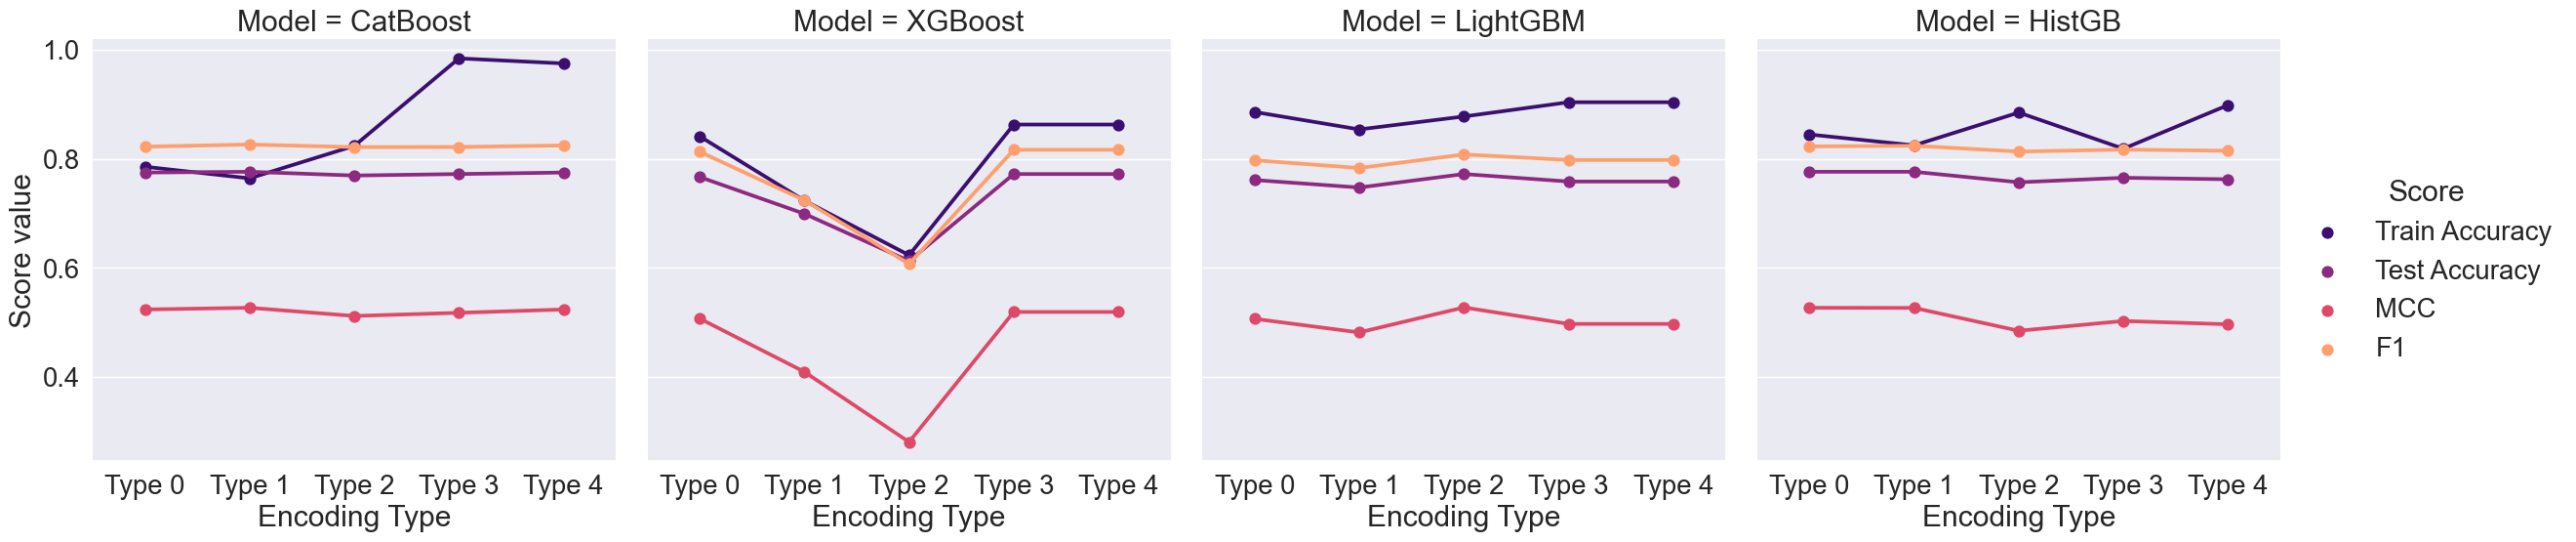

In [23]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="Encoding Type", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=1,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [24]:
models = results['Model'].unique().tolist()
temp=results.sort_values(by=['Model', 'MCC', 'F1'], ascending=False)

n=len(encoding_type)
best_per_model_idx = []
for i in range(len(temp.index)):
    if i % n == 0: best_per_model_idx.append(temp.index[i])

**Confusion Matrix**

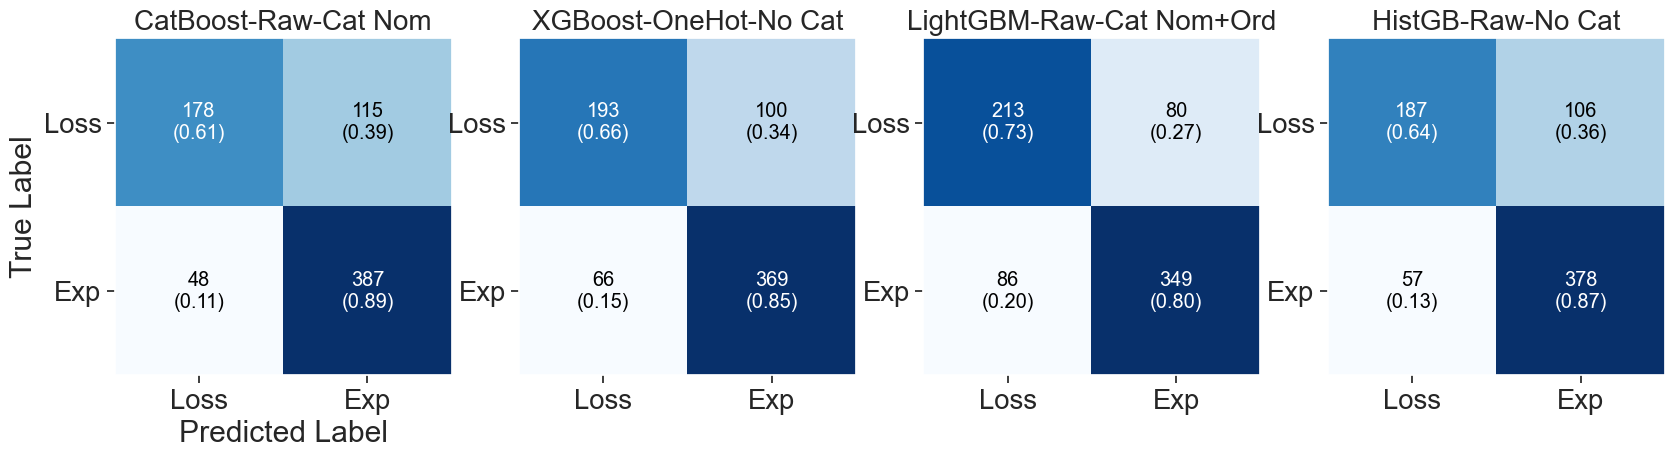

In [25]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

def ticks(x, position):
    if position == 1: return 'Loss'
    if position == 2: return 'Exp'
    if position == 3: return 'Gain'
    
fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'],
                          show_absolute=True, show_normed=True)
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(ticks))
    axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(ticks))
plt.show()